In [1]:
import json

import sys

#fixme
pwd=%pwd
sys.path.append(f"{pwd}/../../../../.local/share/virtualenvs/backtesting-Qh-kRfsi/lib/python3.7/site-packages")
sys.path.append(f"{pwd}/../../../../anaconda3/lib/python3.7/site-packages")

from web3 import Web3

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import requests

In [2]:
from web3.auto.infura import w3
w3.eth.blockNumber

7231214

In [3]:
uniswap_address = "0x09cabEC1eAd1c0Ba254B09efb3EE13841712bE14"
dai_address = "0x89d24A6b4CcB1B6fAA2625fE562bDD9a23260359"
bancor_converter_address = "0xCBc6a023eb975a1e2630223a7959988948E664f3"
bancor_dai_bnt_address = "0x587044b74004E3D5eF2D453b7F8d198d9e4cB558"
eth2dai_address = "0x39755357759cE0d7f32dC8dC45414CCa409AE24e"


In [4]:
uniswap_ABI = json.loads("""[{"name": "TokenPurchase", "inputs": [{"type": "address", "name": "buyer", "indexed": true}, {"type": "uint256", "name": "eth_sold", "indexed": true}, {"type": "uint256", "name": "tokens_bought", "indexed": true}], "anonymous": false, "type": "event"}, {"name": "EthPurchase", "inputs": [{"type": "address", "name": "buyer", "indexed": true}, {"type": "uint256", "name": "tokens_sold", "indexed": true}, {"type": "uint256", "name": "eth_bought", "indexed": true}], "anonymous": false, "type": "event"}, {"name": "AddLiquidity", "inputs": [{"type": "address", "name": "provider", "indexed": true}, {"type": "uint256", "name": "eth_amount", "indexed": true}, {"type": "uint256", "name": "token_amount", "indexed": true}], "anonymous": false, "type": "event"}, {"name": "RemoveLiquidity", "inputs": [{"type": "address", "name": "provider", "indexed": true}, {"type": "uint256", "name": "eth_amount", "indexed": true}, {"type": "uint256", "name": "token_amount", "indexed": true}], "anonymous": false, "type": "event"}, {"name": "Transfer", "inputs": [{"type": "address", "name": "_from", "indexed": true}, {"type": "address", "name": "_to", "indexed": true}, {"type": "uint256", "name": "_value", "indexed": false}], "anonymous": false, "type": "event"}, {"name": "Approval", "inputs": [{"type": "address", "name": "_owner", "indexed": true}, {"type": "address", "name": "_spender", "indexed": true}, {"type": "uint256", "name": "_value", "indexed": false}], "anonymous": false, "type": "event"}, {"name": "setup", "outputs": [], "inputs": [{"type": "address", "name": "token_addr"}], "constant": false, "payable": false, "type": "function", "gas": 175875}, {"name": "addLiquidity", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "min_liquidity"}, {"type": "uint256", "name": "max_tokens"}, {"type": "uint256", "name": "deadline"}], "constant": false, "payable": true, "type": "function", "gas": 82605}, {"name": "removeLiquidity", "outputs": [{"type": "uint256", "name": "out"}, {"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "amount"}, {"type": "uint256", "name": "min_eth"}, {"type": "uint256", "name": "min_tokens"}, {"type": "uint256", "name": "deadline"}], "constant": false, "payable": false, "type": "function", "gas": 116814}, {"name": "__default__", "outputs": [], "inputs": [], "constant": false, "payable": true, "type": "function"}, {"name": "ethToTokenSwapInput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "min_tokens"}, {"type": "uint256", "name": "deadline"}], "constant": false, "payable": true, "type": "function", "gas": 12757}, {"name": "ethToTokenTransferInput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "min_tokens"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "recipient"}], "constant": false, "payable": true, "type": "function", "gas": 12965}, {"name": "ethToTokenSwapOutput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_bought"}, {"type": "uint256", "name": "deadline"}], "constant": false, "payable": true, "type": "function", "gas": 50455}, {"name": "ethToTokenTransferOutput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_bought"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "recipient"}], "constant": false, "payable": true, "type": "function", "gas": 50663}, {"name": "tokenToEthSwapInput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_sold"}, {"type": "uint256", "name": "min_eth"}, {"type": "uint256", "name": "deadline"}], "constant": false, "payable": false, "type": "function", "gas": 47503}, {"name": "tokenToEthTransferInput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_sold"}, {"type": "uint256", "name": "min_eth"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "recipient"}], "constant": false, "payable": false, "type": "function", "gas": 47712}, {"name": "tokenToEthSwapOutput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "eth_bought"}, {"type": "uint256", "name": "max_tokens"}, {"type": "uint256", "name": "deadline"}], "constant": false, "payable": false, "type": "function", "gas": 50175}, {"name": "tokenToEthTransferOutput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "eth_bought"}, {"type": "uint256", "name": "max_tokens"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "recipient"}], "constant": false, "payable": false, "type": "function", "gas": 50384}, {"name": "tokenToTokenSwapInput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_sold"}, {"type": "uint256", "name": "min_tokens_bought"}, {"type": "uint256", "name": "min_eth_bought"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "token_addr"}], "constant": false, "payable": false, "type": "function", "gas": 51007}, {"name": "tokenToTokenTransferInput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_sold"}, {"type": "uint256", "name": "min_tokens_bought"}, {"type": "uint256", "name": "min_eth_bought"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "recipient"}, {"type": "address", "name": "token_addr"}], "constant": false, "payable": false, "type": "function", "gas": 51098}, {"name": "tokenToTokenSwapOutput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_bought"}, {"type": "uint256", "name": "max_tokens_sold"}, {"type": "uint256", "name": "max_eth_sold"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "token_addr"}], "constant": false, "payable": false, "type": "function", "gas": 54928}, {"name": "tokenToTokenTransferOutput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_bought"}, {"type": "uint256", "name": "max_tokens_sold"}, {"type": "uint256", "name": "max_eth_sold"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "recipient"}, {"type": "address", "name": "token_addr"}], "constant": false, "payable": false, "type": "function", "gas": 55019}, {"name": "tokenToExchangeSwapInput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_sold"}, {"type": "uint256", "name": "min_tokens_bought"}, {"type": "uint256", "name": "min_eth_bought"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "exchange_addr"}], "constant": false, "payable": false, "type": "function", "gas": 49342}, {"name": "tokenToExchangeTransferInput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_sold"}, {"type": "uint256", "name": "min_tokens_bought"}, {"type": "uint256", "name": "min_eth_bought"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "recipient"}, {"type": "address", "name": "exchange_addr"}], "constant": false, "payable": false, "type": "function", "gas": 49532}, {"name": "tokenToExchangeSwapOutput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_bought"}, {"type": "uint256", "name": "max_tokens_sold"}, {"type": "uint256", "name": "max_eth_sold"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "exchange_addr"}], "constant": false, "payable": false, "type": "function", "gas": 53233}, {"name": "tokenToExchangeTransferOutput", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_bought"}, {"type": "uint256", "name": "max_tokens_sold"}, {"type": "uint256", "name": "max_eth_sold"}, {"type": "uint256", "name": "deadline"}, {"type": "address", "name": "recipient"}, {"type": "address", "name": "exchange_addr"}], "constant": false, "payable": false, "type": "function", "gas": 53423}, {"name": "getEthToTokenInputPrice", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "eth_sold"}], "constant": true, "payable": false, "type": "function", "gas": 5542}, {"name": "getEthToTokenOutputPrice", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_bought"}], "constant": true, "payable": false, "type": "function", "gas": 6872}, {"name": "getTokenToEthInputPrice", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "tokens_sold"}], "constant": true, "payable": false, "type": "function", "gas": 5637}, {"name": "getTokenToEthOutputPrice", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "uint256", "name": "eth_bought"}], "constant": true, "payable": false, "type": "function", "gas": 6897}, {"name": "tokenAddress", "outputs": [{"type": "address", "name": "out"}], "inputs": [], "constant": true, "payable": false, "type": "function", "gas": 1413}, {"name": "factoryAddress", "outputs": [{"type": "address", "name": "out"}], "inputs": [], "constant": true, "payable": false, "type": "function", "gas": 1443}, {"name": "balanceOf", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "address", "name": "_owner"}], "constant": true, "payable": false, "type": "function", "gas": 1645}, {"name": "transfer", "outputs": [{"type": "bool", "name": "out"}], "inputs": [{"type": "address", "name": "_to"}, {"type": "uint256", "name": "_value"}], "constant": false, "payable": false, "type": "function", "gas": 75034}, {"name": "transferFrom", "outputs": [{"type": "bool", "name": "out"}], "inputs": [{"type": "address", "name": "_from"}, {"type": "address", "name": "_to"}, {"type": "uint256", "name": "_value"}], "constant": false, "payable": false, "type": "function", "gas": 110907}, {"name": "approve", "outputs": [{"type": "bool", "name": "out"}], "inputs": [{"type": "address", "name": "_spender"}, {"type": "uint256", "name": "_value"}], "constant": false, "payable": false, "type": "function", "gas": 38769}, {"name": "allowance", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [{"type": "address", "name": "_owner"}, {"type": "address", "name": "_spender"}], "constant": true, "payable": false, "type": "function", "gas": 1925}, {"name": "name", "outputs": [{"type": "bytes32", "name": "out"}], "inputs": [], "constant": true, "payable": false, "type": "function", "gas": 1623}, {"name": "symbol", "outputs": [{"type": "bytes32", "name": "out"}], "inputs": [], "constant": true, "payable": false, "type": "function", "gas": 1653}, {"name": "decimals", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [], "constant": true, "payable": false, "type": "function", "gas": 1683}, {"name": "totalSupply", "outputs": [{"type": "uint256", "name": "out"}], "inputs": [], "constant": true, "payable": false, "type": "function", "gas": 1713}]""")
dai_ABI = json.loads("""[{"constant":true,"inputs":[],"name":"name","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"stop","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"guy","type":"address"},{"name":"wad","type":"uint256"}],"name":"approve","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"owner_","type":"address"}],"name":"setOwner","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"totalSupply","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"src","type":"address"},{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"transferFrom","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"decimals","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"guy","type":"address"},{"name":"wad","type":"uint256"}],"name":"mint","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"wad","type":"uint256"}],"name":"burn","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"name_","type":"bytes32"}],"name":"setName","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"src","type":"address"}],"name":"balanceOf","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"stopped","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"authority_","type":"address"}],"name":"setAuthority","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"owner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"symbol","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"guy","type":"address"},{"name":"wad","type":"uint256"}],"name":"burn","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"wad","type":"uint256"}],"name":"mint","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"transfer","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"push","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"src","type":"address"},{"name":"dst","type":"address"},{"name":"wad","type":"uint256"}],"name":"move","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"start","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"authority","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"guy","type":"address"}],"name":"approve","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"src","type":"address"},{"name":"guy","type":"address"}],"name":"allowance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"src","type":"address"},{"name":"wad","type":"uint256"}],"name":"pull","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[{"name":"symbol_","type":"bytes32"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"name":"guy","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Mint","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"guy","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Burn","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"authority","type":"address"}],"name":"LogSetAuthority","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"owner","type":"address"}],"name":"LogSetOwner","type":"event"},{"anonymous":true,"inputs":[{"indexed":true,"name":"sig","type":"bytes4"},{"indexed":true,"name":"guy","type":"address"},{"indexed":true,"name":"foo","type":"bytes32"},{"indexed":true,"name":"bar","type":"bytes32"},{"indexed":false,"name":"wad","type":"uint256"},{"indexed":false,"name":"fax","type":"bytes"}],"name":"LogNote","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"src","type":"address"},{"indexed":true,"name":"guy","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Approval","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"src","type":"address"},{"indexed":true,"name":"dst","type":"address"},{"indexed":false,"name":"wad","type":"uint256"}],"name":"Transfer","type":"event"}]""")
bancor_converter_ABI = json.loads("""[{"constant":true,"inputs":[],"name":"BANCOR_CONVERTER_UPGRADER","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_connectorToken","type":"address"},{"name":"_weight","type":"uint32"},{"name":"_enableVirtualBalance","type":"bool"},{"name":"_virtualBalance","type":"uint256"}],"name":"updateConnector","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"connectors","outputs":[{"name":"virtualBalance","type":"uint256"},{"name":"weight","type":"uint32"},{"name":"isVirtualBalanceEnabled","type":"bool"},{"name":"isSaleEnabled","type":"bool"},{"name":"isSet","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"connectorTokens","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BNT_TOKEN","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"_fromToken","type":"address"},{"name":"_toToken","type":"address"},{"name":"_amount","type":"uint256"}],"name":"getReturn","outputs":[{"name":"","type":"uint256"},{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"allowRegistryUpdate","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_newOwner","type":"address"}],"name":"transferTokenOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_path","type":"address[]"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"},{"name":"_block","type":"uint256"},{"name":"_v","type":"uint8"},{"name":"_r","type":"bytes32"},{"name":"_s","type":"bytes32"}],"name":"quickConvertPrioritized","outputs":[{"name":"","type":"uint256"}],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_disable","type":"bool"}],"name":"disableConversions","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"CONTRACT_REGISTRY","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_fromToken","type":"address"},{"name":"_toToken","type":"address"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"}],"name":"convertInternal","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"acceptTokenOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"_amount","type":"uint256"},{"name":"_magnitude","type":"uint8"}],"name":"getFinalAmount","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"converterType","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_token","type":"address"},{"name":"_weight","type":"uint32"},{"name":"_enableVirtualBalance","type":"bool"}],"name":"addConnector","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_amount","type":"uint256"}],"name":"liquidate","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_token","type":"address"},{"name":"_to","type":"address"},{"name":"_amount","type":"uint256"}],"name":"withdrawFromToken","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"newManager","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"manager","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"updateRegistry","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_whitelist","type":"address"}],"name":"setConversionWhitelist","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_path","type":"address[]"},{"name":"_minReturn","type":"uint256"},{"name":"_conversionId","type":"uint256"},{"name":"_block","type":"uint256"},{"name":"_v","type":"uint8"},{"name":"_r","type":"bytes32"},{"name":"_s","type":"bytes32"}],"name":"completeXConversion","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"version","outputs":[{"name":"","type":"uint16"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"conversionFee","outputs":[{"name":"","type":"uint32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_CONVERTER_FACTORY","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_token","type":"address"},{"name":"_to","type":"address"},{"name":"_amount","type":"uint256"}],"name":"withdrawTokens","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_fromToken","type":"address"},{"name":"_toToken","type":"address"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"}],"name":"change","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"prevRegistry","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BNT_CONVERTER","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_FORMULA","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"connectorTokenCount","outputs":[{"name":"","type":"uint16"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"_connectorToken","type":"address"},{"name":"_sellAmount","type":"uint256"}],"name":"getSaleReturn","outputs":[{"name":"","type":"uint256"},{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_fromToken","type":"address"},{"name":"_toToken","type":"address"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"}],"name":"convert","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"acceptOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"registry","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"CONTRACT_FEATURES","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_disable","type":"bool"}],"name":"disableTokenTransfers","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"claimTokensEnabled","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"owner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"_fromConnectorToken","type":"address"},{"name":"_toConnectorToken","type":"address"},{"name":"_sellAmount","type":"uint256"}],"name":"getCrossConnectorReturn","outputs":[{"name":"","type":"uint256"},{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_NETWORK","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_GAS_PRICE_LIMIT","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"CONVERTER_CONVERSION_WHITELIST","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"maxConversionFee","outputs":[{"name":"","type":"uint32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_connectorToken","type":"address"},{"name":"_disable","type":"bool"}],"name":"disableConnectorSale","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"_connectorToken","type":"address"},{"name":"_depositAmount","type":"uint256"}],"name":"getPurchaseReturn","outputs":[{"name":"","type":"uint256"},{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_enable","type":"bool"}],"name":"enableClaimTokens","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"restoreRegistry","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"conversionsEnabled","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"conversionWhitelist","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_X","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"acceptManagement","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_amount","type":"uint256"}],"name":"fund","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_X_UPGRADER","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"newOwner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"upgrade","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"_connectorToken","type":"address"}],"name":"getConnectorBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_newManager","type":"address"}],"name":"transferManagement","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_conversionFee","type":"uint32"}],"name":"setConversionFee","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_path","type":"address[]"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"}],"name":"quickConvert","outputs":[{"name":"","type":"uint256"}],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_newOwner","type":"address"}],"name":"transferOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_disable","type":"bool"}],"name":"disableRegistryUpdate","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"token","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_from","type":"address"},{"name":"_amount","type":"uint256"}],"name":"claimTokens","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"inputs":[{"name":"_token","type":"address"},{"name":"_registry","type":"address"},{"name":"_maxConversionFee","type":"uint32"},{"name":"_connectorToken","type":"address"},{"name":"_connectorWeight","type":"uint32"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_fromToken","type":"address"},{"indexed":true,"name":"_toToken","type":"address"},{"indexed":true,"name":"_trader","type":"address"},{"indexed":false,"name":"_amount","type":"uint256"},{"indexed":false,"name":"_return","type":"uint256"},{"indexed":false,"name":"_conversionFee","type":"int256"}],"name":"Conversion","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_connectorToken","type":"address"},{"indexed":false,"name":"_tokenSupply","type":"uint256"},{"indexed":false,"name":"_connectorBalance","type":"uint256"},{"indexed":false,"name":"_connectorWeight","type":"uint32"}],"name":"PriceDataUpdate","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_prevFee","type":"uint32"},{"indexed":false,"name":"_newFee","type":"uint32"}],"name":"ConversionFeeUpdate","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_conversionsEnabled","type":"bool"}],"name":"ConversionsEnable","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_prevManager","type":"address"},{"indexed":true,"name":"_newManager","type":"address"}],"name":"ManagerUpdate","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_prevOwner","type":"address"},{"indexed":true,"name":"_newOwner","type":"address"}],"name":"OwnerUpdate","type":"event"}]""")
bancor_dai_bnt_ABI = json.loads("""[{"constant":true,"inputs":[],"name":"BANCOR_CONVERTER_UPGRADER","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_connectorToken","type":"address"},{"name":"_weight","type":"uint32"},{"name":"_enableVirtualBalance","type":"bool"},{"name":"_virtualBalance","type":"uint256"}],"name":"updateConnector","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"connectors","outputs":[{"name":"virtualBalance","type":"uint256"},{"name":"weight","type":"uint32"},{"name":"isVirtualBalanceEnabled","type":"bool"},{"name":"isPurchaseEnabled","type":"bool"},{"name":"isSet","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"connectorTokens","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BNT_TOKEN","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"_fromToken","type":"address"},{"name":"_toToken","type":"address"},{"name":"_amount","type":"uint256"}],"name":"getReturn","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_newOwner","type":"address"}],"name":"transferTokenOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_path","type":"address[]"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"},{"name":"_block","type":"uint256"},{"name":"_v","type":"uint8"},{"name":"_r","type":"bytes32"},{"name":"_s","type":"bytes32"}],"name":"quickConvertPrioritized","outputs":[{"name":"","type":"uint256"}],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_disable","type":"bool"}],"name":"disableConversions","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_fromToken","type":"address"},{"name":"_toToken","type":"address"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"}],"name":"convertInternal","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"acceptTokenOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"_amount","type":"uint256"},{"name":"_magnitude","type":"uint8"}],"name":"getFinalAmount","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"converterType","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_token","type":"address"},{"name":"_weight","type":"uint32"},{"name":"_enableVirtualBalance","type":"bool"}],"name":"addConnector","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_token","type":"address"},{"name":"_to","type":"address"},{"name":"_amount","type":"uint256"}],"name":"withdrawFromToken","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"newManager","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"manager","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_whitelist","type":"address"}],"name":"setConversionWhitelist","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"clearQuickBuyPath","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_connectorToken","type":"address"},{"name":"_disable","type":"bool"}],"name":"disableConnectorPurchases","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"version","outputs":[{"name":"","type":"string"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"conversionFee","outputs":[{"name":"","type":"uint32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_CONVERTER_FACTORY","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_token","type":"address"},{"name":"_to","type":"address"},{"name":"_amount","type":"uint256"}],"name":"withdrawTokens","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_fromToken","type":"address"},{"name":"_toToken","type":"address"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"}],"name":"change","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_FORMULA","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"connectorTokenCount","outputs":[{"name":"","type":"uint16"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"_connectorToken","type":"address"},{"name":"_sellAmount","type":"uint256"}],"name":"getSaleReturn","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_fromToken","type":"address"},{"name":"_toToken","type":"address"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"}],"name":"convert","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"acceptOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"registry","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"CONTRACT_FEATURES","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_disable","type":"bool"}],"name":"disableTokenTransfers","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"owner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"_fromConnectorToken","type":"address"},{"name":"_toConnectorToken","type":"address"},{"name":"_sellAmount","type":"uint256"}],"name":"getCrossConnectorReturn","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_NETWORK","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"BANCOR_GAS_PRICE_LIMIT","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"CONVERTER_CONVERSION_WHITELIST","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getQuickBuyPathLength","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"maxConversionFee","outputs":[{"name":"","type":"uint32"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"_connectorToken","type":"address"},{"name":"_depositAmount","type":"uint256"}],"name":"getPurchaseReturn","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_registry","type":"address"}],"name":"setRegistry","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"conversionsEnabled","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"conversionWhitelist","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[],"name":"acceptManagement","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_path","type":"address[]"}],"name":"setQuickBuyPath","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"newOwner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"_connectorToken","type":"address"}],"name":"getConnectorBalance","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_newManager","type":"address"}],"name":"transferManagement","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"quickBuyPath","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"_conversionFee","type":"uint32"}],"name":"setConversionFee","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"_path","type":"address[]"},{"name":"_amount","type":"uint256"},{"name":"_minReturn","type":"uint256"}],"name":"quickConvert","outputs":[{"name":"","type":"uint256"}],"payable":true,"stateMutability":"payable","type":"function"},{"constant":false,"inputs":[{"name":"_newOwner","type":"address"}],"name":"transferOwnership","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"token","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"_token","type":"address"},{"name":"_registry","type":"address"},{"name":"_maxConversionFee","type":"uint32"},{"name":"_connectorToken","type":"address"},{"name":"_connectorWeight","type":"uint32"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"payable":true,"stateMutability":"payable","type":"fallback"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_fromToken","type":"address"},{"indexed":true,"name":"_toToken","type":"address"},{"indexed":true,"name":"_trader","type":"address"},{"indexed":false,"name":"_amount","type":"uint256"},{"indexed":false,"name":"_return","type":"uint256"},{"indexed":false,"name":"_conversionFee","type":"int256"}],"name":"Conversion","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_connectorToken","type":"address"},{"indexed":false,"name":"_tokenSupply","type":"uint256"},{"indexed":false,"name":"_connectorBalance","type":"uint256"},{"indexed":false,"name":"_connectorWeight","type":"uint32"}],"name":"PriceDataUpdate","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"_prevFee","type":"uint32"},{"indexed":false,"name":"_newFee","type":"uint32"}],"name":"ConversionFeeUpdate","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_prevManager","type":"address"},{"indexed":true,"name":"_newManager","type":"address"}],"name":"ManagerUpdate","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"_prevOwner","type":"address"},{"indexed":true,"name":"_newOwner","type":"address"}],"name":"OwnerUpdate","type":"event"}]""")
eth2dai_ABI = json.loads("""[{"constant":true,"inputs":[],"name":"matchingEnabled","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"sell_gem","type":"address"},{"name":"buy_gem","type":"address"}],"name":"getBestOffer","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"pay_gem","type":"address"},{"name":"pay_amt","type":"uint256"},{"name":"buy_gem","type":"address"},{"name":"min_fill_amount","type":"uint256"}],"name":"sellAllAmount","outputs":[{"name":"fill_amt","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[],"name":"stop","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"pay_gem","type":"address"},{"name":"buy_gem","type":"address"},{"name":"pay_amt","type":"uint128"},{"name":"buy_amt","type":"uint128"}],"name":"make","outputs":[{"name":"","type":"bytes32"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"owner_","type":"address"}],"name":"setOwner","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"buy_gem","type":"address"},{"name":"pay_gem","type":"address"},{"name":"pay_amt","type":"uint256"}],"name":"getBuyAmount","outputs":[{"name":"fill_amt","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"pay_amt","type":"uint256"},{"name":"pay_gem","type":"address"},{"name":"buy_amt","type":"uint256"},{"name":"buy_gem","type":"address"},{"name":"pos","type":"uint256"}],"name":"offer","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"id","type":"uint256"},{"name":"pos","type":"uint256"}],"name":"insert","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"last_offer_id","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"matchingEnabled_","type":"bool"}],"name":"setMatchingEnabled","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"id","type":"uint256"}],"name":"cancel","outputs":[{"name":"success","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"id","type":"uint256"}],"name":"getOffer","outputs":[{"name":"","type":"uint256"},{"name":"","type":"address"},{"name":"","type":"uint256"},{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"id","type":"uint256"}],"name":"del_rank","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"id","type":"bytes32"},{"name":"maxTakeAmount","type":"uint128"}],"name":"take","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"pay_gem","type":"address"}],"name":"getMinSell","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getTime","outputs":[{"name":"","type":"uint64"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"dustId","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"id","type":"uint256"}],"name":"getNextUnsortedOffer","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"close_time","outputs":[{"name":"","type":"uint64"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"},{"name":"","type":"address"}],"name":"_span","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"},{"name":"","type":"address"}],"name":"_best","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"stopped","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"id_","type":"bytes32"}],"name":"bump","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"authority_","type":"address"}],"name":"setAuthority","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"sell_gem","type":"address"},{"name":"buy_gem","type":"address"}],"name":"getOfferCount","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"buy_gem","type":"address"},{"name":"buy_amt","type":"uint256"},{"name":"pay_gem","type":"address"},{"name":"max_fill_amount","type":"uint256"}],"name":"buyAllAmount","outputs":[{"name":"fill_amt","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[{"name":"id","type":"uint256"}],"name":"isActive","outputs":[{"name":"active","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"offers","outputs":[{"name":"pay_amt","type":"uint256"},{"name":"pay_gem","type":"address"},{"name":"buy_amt","type":"uint256"},{"name":"buy_gem","type":"address"},{"name":"owner","type":"address"},{"name":"timestamp","type":"uint64"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"getFirstUnsortedOffer","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"owner","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"id","type":"uint256"}],"name":"getBetterOffer","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"address"}],"name":"_dust","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"id","type":"uint256"}],"name":"getWorseOffer","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"_near","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"id","type":"bytes32"}],"name":"kill","outputs":[],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"pay_gem","type":"address"},{"name":"dust","type":"uint256"}],"name":"setMinSell","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"authority","outputs":[{"name":"","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[],"name":"isClosed","outputs":[{"name":"closed","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"","type":"uint256"}],"name":"_rank","outputs":[{"name":"next","type":"uint256"},{"name":"prev","type":"uint256"},{"name":"delb","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"id","type":"uint256"}],"name":"getOwner","outputs":[{"name":"owner","type":"address"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"id","type":"uint256"}],"name":"isOfferSorted","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":false,"inputs":[{"name":"buyEnabled_","type":"bool"}],"name":"setBuyEnabled","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"id","type":"uint256"},{"name":"amount","type":"uint256"}],"name":"buy","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"pay_amt","type":"uint256"},{"name":"pay_gem","type":"address"},{"name":"buy_amt","type":"uint256"},{"name":"buy_gem","type":"address"},{"name":"pos","type":"uint256"},{"name":"rounding","type":"bool"}],"name":"offer","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":false,"inputs":[{"name":"pay_amt","type":"uint256"},{"name":"pay_gem","type":"address"},{"name":"buy_amt","type":"uint256"},{"name":"buy_gem","type":"address"}],"name":"offer","outputs":[{"name":"","type":"uint256"}],"payable":false,"stateMutability":"nonpayable","type":"function"},{"constant":true,"inputs":[],"name":"buyEnabled","outputs":[{"name":"","type":"bool"}],"payable":false,"stateMutability":"view","type":"function"},{"constant":true,"inputs":[{"name":"pay_gem","type":"address"},{"name":"buy_gem","type":"address"},{"name":"buy_amt","type":"uint256"}],"name":"getPayAmount","outputs":[{"name":"fill_amt","type":"uint256"}],"payable":false,"stateMutability":"view","type":"function"},{"inputs":[{"name":"close_time","type":"uint64"}],"payable":false,"stateMutability":"nonpayable","type":"constructor"},{"anonymous":true,"inputs":[{"indexed":true,"name":"sig","type":"bytes4"},{"indexed":true,"name":"guy","type":"address"},{"indexed":true,"name":"foo","type":"bytes32"},{"indexed":true,"name":"bar","type":"bytes32"},{"indexed":false,"name":"wad","type":"uint256"},{"indexed":false,"name":"fax","type":"bytes"}],"name":"LogNote","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"id","type":"uint256"}],"name":"LogItemUpdate","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"pay_amt","type":"uint256"},{"indexed":true,"name":"pay_gem","type":"address"},{"indexed":false,"name":"buy_amt","type":"uint256"},{"indexed":true,"name":"buy_gem","type":"address"}],"name":"LogTrade","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"id","type":"bytes32"},{"indexed":true,"name":"pair","type":"bytes32"},{"indexed":true,"name":"maker","type":"address"},{"indexed":false,"name":"pay_gem","type":"address"},{"indexed":false,"name":"buy_gem","type":"address"},{"indexed":false,"name":"pay_amt","type":"uint128"},{"indexed":false,"name":"buy_amt","type":"uint128"},{"indexed":false,"name":"timestamp","type":"uint64"}],"name":"LogMake","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"id","type":"bytes32"},{"indexed":true,"name":"pair","type":"bytes32"},{"indexed":true,"name":"maker","type":"address"},{"indexed":false,"name":"pay_gem","type":"address"},{"indexed":false,"name":"buy_gem","type":"address"},{"indexed":false,"name":"pay_amt","type":"uint128"},{"indexed":false,"name":"buy_amt","type":"uint128"},{"indexed":false,"name":"timestamp","type":"uint64"}],"name":"LogBump","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"id","type":"bytes32"},{"indexed":true,"name":"pair","type":"bytes32"},{"indexed":true,"name":"maker","type":"address"},{"indexed":false,"name":"pay_gem","type":"address"},{"indexed":false,"name":"buy_gem","type":"address"},{"indexed":true,"name":"taker","type":"address"},{"indexed":false,"name":"take_amt","type":"uint128"},{"indexed":false,"name":"give_amt","type":"uint128"},{"indexed":false,"name":"timestamp","type":"uint64"}],"name":"LogTake","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"id","type":"bytes32"},{"indexed":true,"name":"pair","type":"bytes32"},{"indexed":true,"name":"maker","type":"address"},{"indexed":false,"name":"pay_gem","type":"address"},{"indexed":false,"name":"buy_gem","type":"address"},{"indexed":false,"name":"pay_amt","type":"uint128"},{"indexed":false,"name":"buy_amt","type":"uint128"},{"indexed":false,"name":"timestamp","type":"uint64"}],"name":"LogKill","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"authority","type":"address"}],"name":"LogSetAuthority","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"name":"owner","type":"address"}],"name":"LogSetOwner","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"isEnabled","type":"bool"}],"name":"LogBuyEnabled","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"pay_gem","type":"address"},{"indexed":false,"name":"min_amount","type":"uint256"}],"name":"LogMinSell","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"isEnabled","type":"bool"}],"name":"LogMatchingEnabled","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"id","type":"uint256"}],"name":"LogUnsortedOffer","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"id","type":"uint256"}],"name":"LogSortedOffer","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"keeper","type":"address"},{"indexed":false,"name":"id","type":"uint256"}],"name":"LogInsert","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"name":"keeper","type":"address"},{"indexed":false,"name":"id","type":"uint256"}],"name":"LogDelete","type":"event"}]""")


In [5]:
uniswap = w3.eth.contract(address=uniswap_address, abi=uniswap_ABI)
dai = w3.eth.contract(address=dai_address, abi=dai_ABI)
bancor = w3.eth.contract(address=bancor_converter_address, abi=bancor_converter_ABI)
bancor_dai_bnt = w3.eth.contract(address=bancor_dai_bnt_address, abi=bancor_dai_bnt_ABI)
eth2dai = w3.eth.contract(address=eth2dai_address, abi=eth2dai_ABI)


In [6]:
start_block = 6629139
#start_block = 7107999

block_to_fetch = 100_000

#last_block = start_block + block_to_fetch
last_block = 7227999

total_block = last_block - start_block

In [7]:
t = np.zeros((total_block, 10))

for i, block in enumerate(range(start_block, last_block)):
    t[i,0] = block

array = pd.DataFrame(t, columns=["block", "poloniex_price", "merge","eth2dai_raw", "eth2dai_price","uniswap_EthPurchase", "uniswap_TokenPurchase", "uniswap_price", "uniswap_raw_liquidity", "uniswap_liquidity"])
array = array.set_index("block")

In [8]:
curr_block = start_block

while curr_block < last_block - 1:
    to_block = min(curr_block + 1_000, last_block - 1)
    #print(f"fetching block {curr_block} to {to_block}")

    #event_filter = bancor_dai_bnt.events.PriceDataUpdate.createFilter(fromBlock=curr_block, toBlock=to_block)
    #_connectorBalance = BNT
    #_tokenSupply = DAI
    
    #for event in event_filter.get_all_entries():
    #    print(f"blocknumber: {event['blockNumber']} and {event}")                  
    
    #event_filter = bancor.events.PriceDataUpdate.createFilter(fromBlock=curr_block, toBlock=to_block)
    #_connectorBalance = 
    #_tokenSupply = 
    
    #for event in event_filter.get_all_entries():
    #    print(f"blocknumber: {event['blockNumber']} and {event}")                  

    event_filter = eth2dai.events.LogTrade.createFilter(fromBlock=curr_block, toBlock=to_block)
    
    for event in event_filter.get_all_entries():
        price = event["args"]["pay_amt"] / event["args"]["buy_amt"]
        if price > 50 and price < 200: #dirty filering of MKR, it's 1am I'm allowed
            array.loc[event["blockNumber"]]["eth2dai_raw"] = event["args"]["pay_amt"] / event["args"]["buy_amt"]
            #print(f"blocknumber: {event['blockNumber']} and {event}")
            #print(event["args"]["pay_amt"], event["args"]["buy_amt"], event["args"]["pay_amt"]/ event["args"]["buy_amt"]) 
                  
    curr_block = to_block


In [9]:
d = {
    "EthPurchase": ["tokens_sold", "eth_bought"],
    "TokenPurchase": ["tokens_bought", "eth_sold"],
    "AddLiquidity": [],
    "RemoveLiquidity": []
}

for event_type, params in d.items():
    curr_block = start_block

    while curr_block < last_block - 1:
        to_block = min(curr_block + 2_000, last_block - 1)
        #print(f"fetching block {curr_block} to {to_block} for {event_type}")
        event_filter = getattr(uniswap.events, event_type).createFilter(fromBlock=curr_block, toBlock=to_block)

        for event in event_filter.get_all_entries():
            #print(f"blocknumber: {event['blockNumber']} and {event}")                  
                  
            if event["event"] in ["EthPurchase", "TokenPurchase"]:
                array.loc[event["blockNumber"]][f"uniswap_{event_type}"] = event["args"][params[0]] / event["args"][params[1]]
            elif event["event"] in ["AddLiquidity"]:
                array.loc[event["blockNumber"]]["uniswap_raw_liquidity"] += event["args"]["eth_amount"]
            elif event["event"] in ["RemoveLiquidity"]:
                array.loc[event["blockNumber"]]["uniswap_raw_liquidity"] += -event["args"]["eth_amount"]
                
        curr_block = to_block

In [10]:
last_value_price = 0.
last_value_price_eth2dai = 0.
cumulative_liquidity = 0.

wei_to_eth = 10 ** 18

def process_liquidity(series):
    global cumulative_liquidity
    
    if series["uniswap_raw_liquidity"] != 0.:
        #print(f"liquidity, {series['uniswap_raw_liquidity']}")
        cumulative_liquidity += series["uniswap_raw_liquidity"] / wei_to_eth  
    
    return cumulative_liquidity
    
def process_price(series):
    global last_value_price
    
    if series["uniswap_EthPurchase"] != 0.:
        last_value_price = series["uniswap_EthPurchase"]
    
    if series["uniswap_TokenPurchase"] != 0.:
        last_value_price = series["uniswap_TokenPurchase"]
        #assert(series["uniswap_EthPurchase"] == 0)
        
    return last_value_price

def process_price_eth2dai(series):
    global last_value_price_eth2dai
    
    if series["eth2dai_raw"] != 0.:
        last_value_price_eth2dai = series["eth2dai_raw"]
        
    return last_value_price_eth2dai

def merge(series):
    return (series["eth2dai_price"] + series["uniswap_price"]) / 2


array["uniswap_price"] = array.apply(process_price, axis=1)
array["uniswap_liquidity"] = array.apply(process_liquidity, axis=1)
array["eth2dai_price"] = array.apply(process_price_eth2dai, axis=1)
array["merge"] = array.apply(merge, axis=1)

In [11]:
import pickle

with open('blocks.pickle', 'rb') as handle:
    blocks = pickle.load(handle)

with open('poloniex.pickle', 'rb') as handle:
    np_candles = pickle.load(handle)
    
#plt.plot(np_candles[:,:1], np_candles[:,1:])    
    
def poloniex_price(timestamp):
    index = np_candles[:,0].searchsorted(timestamp)
    price = np_candles[index][1]
    #print(f"at {timestamp} poloniex price is {price}")
    return price    
    
array["poloniex_price"] = array.apply(lambda x: poloniex_price(blocks[int(x.name)]), axis=1)

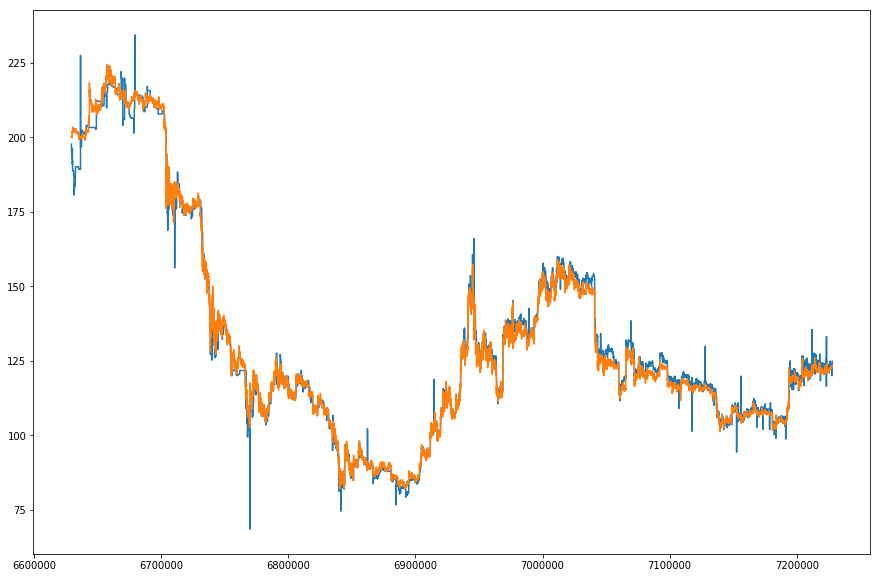

In [12]:
plt.rcParams['figure.figsize'] = [15, 10]

plt.plot(
        array.index.values[50:],
        array["uniswap_price"].iloc[50:],
        array["poloniex_price"].iloc[50:]
)

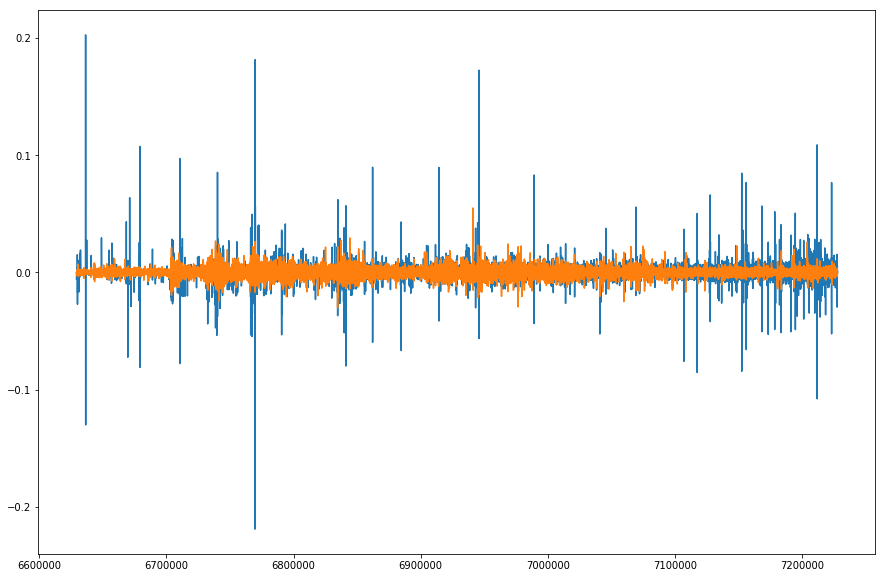

In [13]:
plt.plot(
        array.index.values[50:],
        array["uniswap_price"].iloc[50:].pct_change(1),
        array["poloniex_price"].iloc[50:].pct_change(1)
)

#block - block-1 / block-1

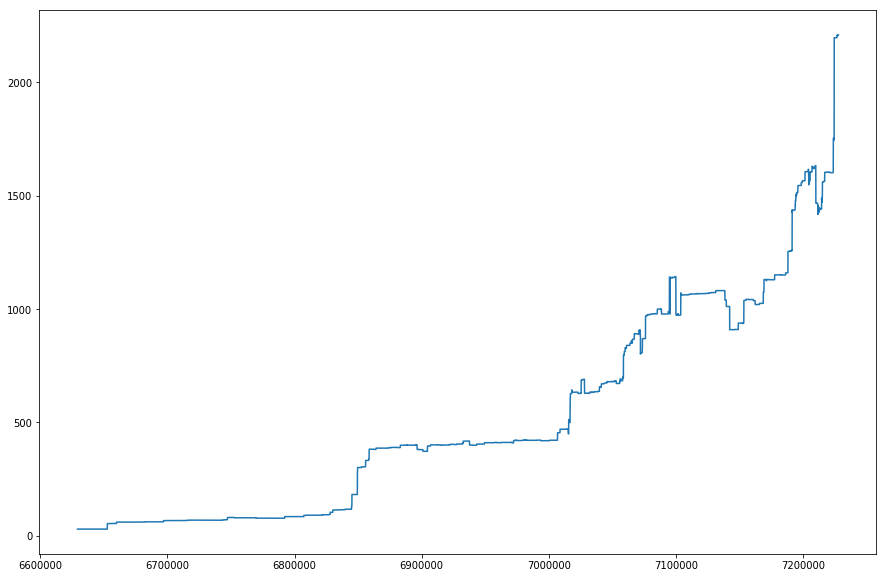

In [14]:
plt.plot(
        array.index.values[50:],
        array["uniswap_liquidity"].iloc[50:]
)

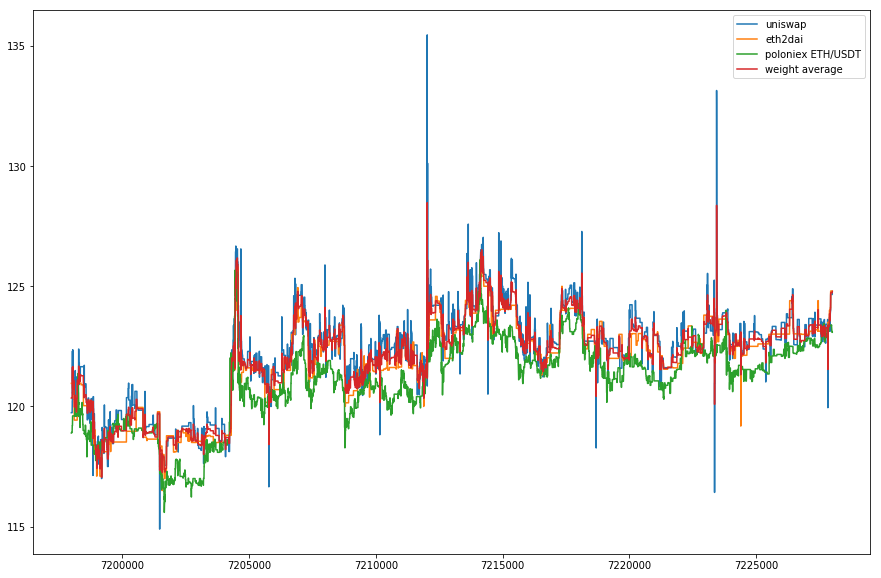

In [15]:
plt.plot(array.index.values[-30000:], array["uniswap_price"].iloc[-30000:], label='uniswap')
plt.plot(array.index.values[-30000:], array["eth2dai_price"].iloc[-30000:], label='eth2dai')
plt.plot(array.index.values[-30000:], array["poloniex_price"].iloc[-30000:], label='poloniex ETH/USDT')
plt.plot(array.index.values[-30000:], array["merge"].iloc[-30000:], label='weight average')
plt.legend()